In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [5]:
# use for getting binary representation
u = np.array([[4], [2], [1]])

def step(x, rule_binary):
    # compute a single stet of an elementary cellular automaton
    
    # the columns contain the L, C, R values of all cells
    y = np.vstack((np.roll(x, 1), x, np.roll(x, -1))).astype(np.int8)
    
    # we get the LCR pattern numbers between 0 and 7
    z = np.sum(y * u, axis=0).astype(np.int8)
    
    # we get the patterns given by the rule
    return rule_binary[7-z]

def generate(rule, size=80, steps=80):
    # simulate an elementary cellular automaton given its rule (number between 0 and 255)
    
    # compute the binary representation of the rule
    rule_binary = np.array(
        [int(x) for x in np.binary_repr(rule, 8)],
        dtype=np.int8
    )
    x = np.zeros((steps, size), dtype=np.int8)
    # random initial state
    x[0,:] = np.random.rand(size) < .5
    # apply the step function iteratively
    for i in range(steps-1):
        x[i+1, :] = step(x[i, :], rule_binary)
    return x



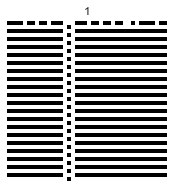

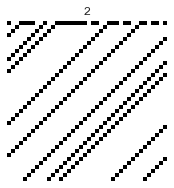

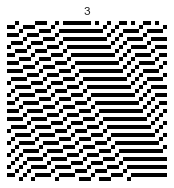

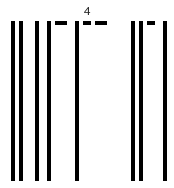

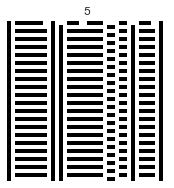

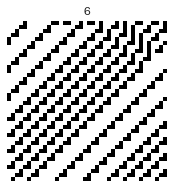

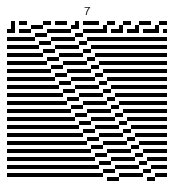

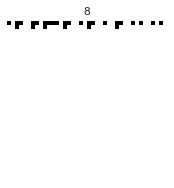

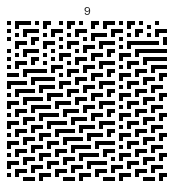

In [6]:
rules = [ 1, 2, 3,
          4, 5, 6,
          7, 8, 9
        ]

for i, rule in enumerate(rules):
    x = generate(rule, size=40, steps=40)
    plt.figure(figsize=(10,10))
    plt.subplot(331+i)
    plt.imshow(x, interpolation='none', cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(rule))

Text(0.5,1,'9')

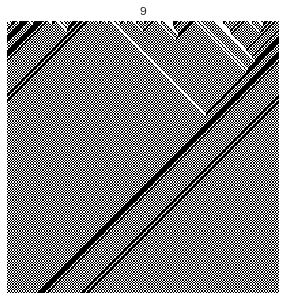

In [7]:
x = generate(184, size=200, steps=200)
plt.figure(figsize=(5,5))
plt.imshow(x, interpolation='none', cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title(str(rule))

In [ ]:
# [Conway's Game of Life in Python | Pythonic Perambulations](http://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/)

